# trell social media usage data

## The goal is to predict the age group

#### In this world of big data, Trell wants you to use the data to predict the age group of their users based on their activity on social media activities. This will help them to divide their huge userbase and cater differently to each of them.

https://trell.co/watch/


The resource of the dataset:

https://www.kaggle.com/adityak80/trell-social-media-usage-data

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('/Users/themassiveboy/Downloads/train_age_dataset.csv')

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Observe the dataset

In [3]:
df.shape

(488877, 27)

In [4]:
df.columns

Index(['Unnamed: 0', 'userId', 'tier', 'gender', 'following_rate',
       'followers_avg_age', 'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day', 'avgt2',
       'age_group'],
      dtype='object')

In [5]:
df = df.drop('Unnamed: 0' , axis = 1)

### Observe if there is any object type to convert it
#### We apply this approach so we can get valuable information from the model later

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe(include = 'all')

In [6]:
import scipy.stats 

corrs = []
for col in df:
    corr = scipy.stats.spearmanr(df['age_group'], df[col])
    corrs.append({
        'feature': col,
        'correlation': corr[0],
        'correlation_p_value': corr[1]
    })
    
pd.DataFrame(corrs).sort_values('correlation')

,feature,correlation,correlation_p_value
0,userId,-0.201443,0.000000e+00
1,tier,-0.078105,0.000000e+00
2,gender,-0.043622,1.655575e-204
7,num_of_hashtags_per_action,0.026919,4.714582e-79
8,emoji_count_per_action,0.047038,1.738757e-237
11,avgCompletion,0.072369,0.000000e+00
13,avgDuration,0.137311,0.000000e+00
9,punctuations_per_action,0.157710,0.000000e+00
21,slot2_trails_watched_per_day,0.186993,0.000000e+00
20,slot1_trails_watched_per_day,0.190945,0.000000e+00


## This is a categorical feature denoting the age of the user. Age of users is divided into 4 groups, 
### 1: <18y
### 2: 18-24y
### 3: 24-30y
### 4: >30y

In [7]:
df['age_group'].value_counts()

1    308315
4     60803
3     60404
2     59355
Name: age_group, dtype: int64

#### To check if there is any input problems since this is the most important feature for us

In [ ]:
df['age_group'].unique()

In [ ]:
df['tier'].value_counts()

In [8]:
for x in df.columns:
    print("Name of the column:", x)
    print(df[x].nunique())

Name of the column: userId
488877
Name of the column: tier
3
Name of the column: gender
2
Name of the column: following_rate
15453
Name of the column: followers_avg_age
3495
Name of the column: following_avg_age
3949
Name of the column: max_repetitive_punc
95
Name of the column: num_of_hashtags_per_action
420
Name of the column: emoji_count_per_action
742
Name of the column: punctuations_per_action
3129
Name of the column: number_of_words_per_action
16664
Name of the column: avgCompletion
458839
Name of the column: avgTimeSpent
98838
Name of the column: avgDuration
415696
Name of the column: avgComments
186
Name of the column: creations
9972
Name of the column: content_views
32292
Name of the column: num_of_comments
3881
Name of the column: weekends_trails_watched_per_day
20340
Name of the column: weekdays_trails_watched_per_day
31432
Name of the column: slot1_trails_watched_per_day
11765
Name of the column: slot2_trails_watched_per_day
20220
Name of the column: slot3_trails_watched_pe

# Detect outliers

In [9]:
df['tier'].describe()

count    488877.000000
mean          1.975382
std           0.430707
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: tier, dtype: float64

In [10]:
df['age_group'].describe()

count    488877.000000
mean          1.741643
std           1.088559
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: age_group, dtype: float64

In [ ]:
for x in df.columns:
    print('Column name:' , x)
    plt.plot(df[x])
    plt.show()

In [ ]:
for x in df.columns:
    plt.figure(figsize=(8,6))
    print('Column name:' , x)
    sns.boxplot(y=x , data=df)
    plt.show()

# Remove Outliers

In [13]:
import numpy as np
from numpy import percentile

In [14]:
q25, q75 = percentile(df.loc[:,'age_group'], 25), percentile(df.loc[:,'num_of_hashtags_per_action'], 75)
iqr = q75 - q25
print(q25,q75)
print(iqr)

1.0 0.0
-1.0


In [15]:
df['num_of_hashtags_per_action'].describe()

count    488877.000000
mean          0.000277
std           0.012221
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.333333
Name: num_of_hashtags_per_action, dtype: float64

In [16]:
outliers = [x for x in df.loc[:,'num_of_hashtags_per_action'] if x > 0.4]
outliers

[0.642857143,
 0.6,
 0.5,
 0.5,
 0.571428571,
 0.428571429,
 0.5,
 0.666666667,
 0.5,
 0.5,
 2.0,
 0.5,
 0.846153846,
 0.470588235,
 0.5,
 0.538461538,
 0.933333333,
 0.5,
 1.333333333,
 0.5,
 0.428571429,
 0.454545455,
 0.5,
 0.666666667,
 0.5,
 0.444444444,
 1.0,
 0.5,
 0.5,
 1.0,
 1.285714286,
 0.5,
 2.333333333,
 0.666666667,
 0.75,
 1.0,
 1.5,
 0.7692307690000001,
 0.5555555560000001,
 2.333333333,
 0.5,
 1.0,
 0.6,
 1.285714286,
 0.7142857140000001,
 0.875,
 0.75,
 0.5,
 1.166666667,
 0.571428571,
 1.0,
 1.5,
 0.473684211,
 1.0,
 0.5,
 0.538461538,
 0.41666666700000005,
 2.0,
 0.454545455,
 0.8787878790000001,
 0.5,
 1.125,
 1.6666666669999999,
 0.5,
 0.6,
 1.8]

In [17]:
df[df['num_of_hashtags_per_action'] > 0]

,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
305,32612910,2,2,0.007812,0.000000,0.000000,3,0.066667,0.266667,0.133333,...,0.101562,0.000000,0.089844,0.001563,0.000000,0.000000,0.007812,0.179688,186.500000,1
669,220196,2,1,0.050367,2.333333,2.500000,3,0.642857,0.000000,0.928571,...,0.007345,0.002099,0.000525,0.003568,0.015740,0.000000,0.001049,0.002099,2768.463415,2
2857,1956238,1,2,0.018416,2.214286,3.333333,7,0.029412,0.019608,0.186275,...,0.099448,0.000000,0.013812,0.041252,0.034991,0.011050,0.095764,0.092081,191.737533,3
2911,50415054,2,2,0.000000,0.000000,0.000000,4,0.038462,0.000000,0.173077,...,0.411765,0.000000,0.033613,0.073950,0.067227,0.000000,0.369748,0.000000,157.428571,2
3153,38896282,2,1,0.000000,0.000000,0.000000,0,0.033333,0.000000,0.066667,...,0.448000,0.000000,0.212000,0.036800,0.040000,0.016000,0.256000,0.296000,174.250000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487082,58583104,2,1,0.198020,2.500000,2.388889,2,1.800000,0.000000,1.800000,...,0.019802,0.000000,0.000000,0.003960,0.000000,0.000000,0.000000,0.019802,183.933333,2
487292,38586461,1,1,0.000000,0.000000,0.000000,2,0.176471,0.000000,0.529412,...,0.072000,0.000000,0.004000,0.022400,0.008000,0.000000,0.064000,0.048000,182.250000,2
488270,183737,1,1,0.016360,2.200000,2.200000,4,0.004950,0.000000,0.014851,...,0.186094,0.005112,0.041922,0.065235,0.127812,0.024540,0.162577,0.095092,962.513699,2
488443,56089298,2,1,0.009259,0.000000,0.000000,2,0.020408,0.000000,0.142857,...,0.333333,0.000000,0.046296,0.096296,0.000000,0.083333,0.046296,0.444444,218.153846,3


In [18]:
print(len(outliers))

66


In [19]:
outliers = df.query('@outliers in num_of_hashtags_per_action')
outliers

,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
669,220196,2,1,0.050367,2.333333,2.500000,3,0.642857,0.000000,0.928571,...,0.007345,0.002099,0.000525,0.003568,0.01574,0.000000,0.001049,0.002099,2768.463415,2
6219,37366240,2,1,0.000000,0.000000,0.000000,2,0.600000,0.200000,2.200000,...,0.056000,0.000000,0.044000,0.000000,0.00000,0.072000,0.016000,0.000000,0.000000,1
12422,48683031,1,1,0.108333,2.100000,2.500000,3,0.500000,0.083333,1.583333,...,0.075000,0.000000,0.004167,0.016667,0.00000,0.066667,0.016667,0.008333,188.466667,4
26661,35705932,3,1,0.000000,0.000000,0.000000,0,0.500000,0.000000,1.000000,...,0.031746,0.000000,0.023810,0.017460,0.00000,0.039683,0.039683,0.055556,179.500000,3
28559,37874946,2,1,0.000000,0.000000,0.000000,0,0.571429,0.000000,0.571429,...,0.088000,0.008000,0.056000,0.001600,0.00000,0.000000,0.072000,0.048000,84.500000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463289,445970,1,1,0.020782,0.000000,0.000000,0,1.125000,0.000000,2.000000,...,0.004890,0.000000,0.000000,0.000978,0.00000,0.000000,0.000000,0.004890,16980.333330,3
471324,37624575,2,2,0.000000,0.000000,0.000000,0,1.666667,0.000000,1.666667,...,0.016000,0.000000,0.012000,0.000000,0.00000,0.016000,0.000000,0.008000,0.000000,1
472965,33119829,2,2,0.000000,0.000000,0.000000,0,0.500000,0.000000,1.000000,...,0.007874,0.000000,0.000000,0.001575,0.00000,0.007874,0.000000,0.000000,0.000000,1
481292,35293405,1,2,0.023810,2.000000,3.000000,5,0.600000,0.100000,3.400000,...,0.055556,0.000000,0.000000,0.022222,0.00000,0.000000,0.095238,0.015873,136.600000,2


In [20]:
outliers.index

Int64Index([   669,   6219,  12422,  26661,  28559,  33185,  46433,  66945,
             78436,  95455,  95857, 113932, 126613, 130550, 131033, 138332,
            141682, 149163, 176592, 181847, 198807, 200577, 205436, 209230,
            210512, 213022, 225406, 225784, 230990, 231929, 241003, 258616,
            259014, 260577, 261294, 286634, 295596, 308141, 310703, 322958,
            323373, 328697, 340031, 343179, 346085, 346965, 349632, 351170,
            353876, 364094, 368187, 369756, 393818, 394701, 395719, 421302,
            422484, 428001, 435517, 443209, 455769, 463289, 471324, 472965,
            481292, 487082],
           dtype='int64')

In [21]:
df_filtered = df.drop(outliers.index , axis = 0)
df_filtered.shape

(488811, 26)

In [22]:
df.shape[0] - df_filtered.shape[0]

66

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(df['num_of_hashtags_per_action'].values)
plt.title('#hashtags_per_action Values BEFORE removing outliers \n',fontsize=15)

plt.subplot(122)
plt.plot(df_filtered['num_of_hashtags_per_action'].values)
plt.title('#hashtags_per_action Values AFTER removing outliers \n',fontsize=15)

In [ ]:
for x in df_filtered.columns:
    print('Column name:' , x)
    plt.plot(df[x])
    plt.show()

In [23]:
df_filtered['following_rate'].describe()
[x for x in df_filtered.loc[:,'following_rate'] if x > 1]


[19.640625,
 1.285714286,
 1.203883495,
 6.773109244,
 4.414634146,
 106.74166670000001,
 5.677419355,
 4.444444444,
 3.088,
 7.166666667,
 7.37398374,
 1.68907563,
 4.661157025,
 14.16129032,
 3.609756098,
 1.756097561,
 1.4240000000000002,
 18.375999999999998,
 5.9186991870000005,
 23.75590551,
 1.025641026,
 2.392,
 2.828828829,
 1.7165354330000002,
 1.858267717,
 2.19047619,
 1.7377049180000002,
 2.0569105690000002,
 94.41129032,
 1.489833641,
 1.016806723,
 1.157480315,
 1.1693548390000001,
 2.170731707,
 4.5680000000000005,
 2.226415094,
 1.1693548390000001,
 1.691056911,
 44.55555556,
 240.0,
 1.1578947370000001,
 1.8559999999999999,
 4.595041322,
 1.539130435,
 3.257425743,
 2.341269841,
 1.169014085,
 4.992125983999999,
 1.951612903,
 1.9280000000000002,
 8.393700787,
 1.372881356,
 1.658730159,
 1.515873016,
 4.087301587,
 1.268907563,
 45.09448819,
 1.826446281,
 3.8046875,
 1.040983607,
 1.779816514,
 1.672,
 1.071748879,
 1.084033613,
 5.590551181,
 26.32231405,
 1.1219512

# Remove outliers from each age group separately

In [24]:
df_filtered_age_group1 = pd.DataFrame(df_filtered[df_filtered['age_group'] == 1])
df_filtered_age_group1.shape

(308287, 26)

In [216]:
Clean_Again = ['avgTimeSpent', 'content_views' , 'creations', 'avgt2', 'number_of_words_per_action' , 'avgTimeSpent']

for x in Clean_Again:
        print('column name:', x)
        upper_limit = df_filtered_age_group1[x].mean() + 1 * df_filtered_age_group1[x].std()
        lower_limit = df_filtered_age_group1[x].mean() -1 * df_filtered_age_group1[x].std()

        outliers = df_filtered_age_group1[(df_filtered_age_group1[x]>upper_limit) | (df_filtered_age_group1[x]<lower_limit)]
        print(len(outliers))


        df_filtered_age_group1.drop(outliers.index , axis = 0 , inplace= True)
        print(df_filtered_age_group1.shape[0])

column name: avgTimeSpent
31132
49223
column name: content_views
19987
29236
column name: creations
0
29236
column name: avgt2
0
29236
column name: number_of_words_per_action
0
29236
column name: avgTimeSpent
12052
17184


In [ ]:
for x in Clean_Again:
    print('Column name:' , x)
    plt.boxplot(df_filtered_age_group1[x])
    plt.show()

In [31]:
df_filtered_age_group2 = pd.DataFrame(df_filtered[df_filtered['age_group'] == 2])
df_filtered_age_group2.shape

(59335, 26)

In [160]:
Clean_Again = ['avgTimeSpent', 'content_views' , 'creations', 'avgt2', 'number_of_words_per_action' , 'avgTimeSpent']

for x in Clean_Again:
        print('column name:', x)
        upper_limit = df_filtered_age_group2[x].mean() + 3 * df_filtered_age_group2[x].std()
        lower_limit = df_filtered_age_group2[x].mean() -3 * df_filtered_age_group2[x].std()

        outliers = df_filtered_age_group2[(df_filtered_age_group2[x]>upper_limit) | (df_filtered_age_group2[x]<lower_limit)]
        print(len(outliers))


        df_filtered_age_group2.drop(outliers.index , axis = 0 , inplace= True)
        print(df_filtered_age_group2.shape[0])

column name: avgTimeSpent
0
32637
column name: content_views
78
32559
column name: creations
275
32284
column name: avgt2
0
32284
column name: number_of_words_per_action
0
32284
column name: avgTimeSpent
0
32284


In [155]:
df_filtered_age_group3 = pd.DataFrame(df_filtered[df_filtered['age_group'] == 3])
df_filtered_age_group3.shape

(60388, 26)

In [169]:
Clean_Again = ['avgTimeSpent', 'content_views' , 'creations', 'avgt2', 'number_of_words_per_action']

for x in Clean_Again:
        print('column name:', x)
        upper_limit = df_filtered_age_group3[x].mean() + 2 * df_filtered_age_group3[x].std()
        lower_limit = df_filtered_age_group3[x].mean() -2 * df_filtered_age_group3[x].std()

        outliers = df_filtered_age_group3[(df_filtered_age_group3[x]>upper_limit) | (df_filtered_age_group3[x]<lower_limit)]
        print(len(outliers))


        df_filtered_age_group3.drop(outliers.index , axis = 0 , inplace= True)
        print(df_filtered_age_group3.shape[0])

column name: avgTimeSpent
1733
30937
column name: content_views
1860
29077
column name: creations
2434
26643
column name: avgt2
1991
24652
column name: number_of_words_per_action
1403
23249


In [37]:
df_filtered_age_group4 = pd.DataFrame(df_filtered[df_filtered['age_group'] == 4])
df_filtered_age_group4.shape

(60801, 26)

In [150]:
Clean_Again = ['avgTimeSpent', 'content_views' , 'creations', 'avgt2', 'number_of_words_per_action']

for x in Clean_Again:
        print('column name:', x)
        upper_limit = df_filtered_age_group4[x].mean() + 2 * df_filtered_age_group4[x].std()
        lower_limit = df_filtered_age_group4[x].mean() -2 * df_filtered_age_group4[x].std()

        outliers = df_filtered_age_group4[(df_filtered_age_group4[x]>upper_limit) | (df_filtered_age_group4[x]<lower_limit)]
        print(len(outliers))


        df_filtered_age_group4.drop(outliers.index , axis = 0 , inplace= True)
        print(df_filtered_age_group4.shape[0])

column name: avgTimeSpent
1186
22434
column name: content_views
1252
21182
column name: creations
1329
19853
column name: avgt2
1470
18383
column name: number_of_words_per_action
1146
17237


# After Cleaning Our DF  we get the following

In [161]:
df_filtered.shape

(488811, 26)

In [217]:
df = pd.concat([df_filtered_age_group1 , df_filtered_age_group2 , df_filtered_age_group3 , df_filtered_age_group4], axis=0)

In [218]:
df.shape

(89954, 26)

## Better way to see raltions by plotting the data
### We would like to see which tier is the most popular along with the age

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

In [ ]:
for column in df[['tier' , 'age_group']]:
    plt.figure()
    sns.barplot(x = df[column].unique() , y = df[column].value_counts() , data = df)
    plt.show()
    

### Distrubution of the age represnted as a %

In [219]:
df['age_group'].value_counts()

2    32284
3    23249
4    17237
1    17184
Name: age_group, dtype: int64

In [220]:
(df['age_group'].value_counts() / df.shape[0] * 100)


2    35.889455
3    25.845432
4    19.162016
1    19.103097
Name: age_group, dtype: float64

## Observe the relations between the features

### Our goal is to determine the most corellated feature with the age group 

## 1 is identical -1 There are no relation

<AxesSubplot:>

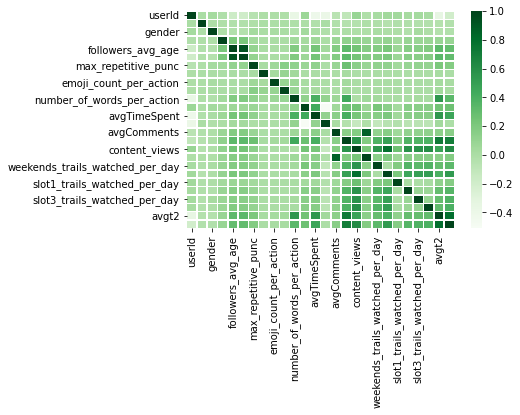

In [174]:
plt.figure(figsize=(6,4))

sns.heatmap(df.corr() , cmap="Greens" , linewidths=0.5)

In [221]:
import scipy.stats 

corrs = []
for col in df:
    corr = scipy.stats.spearmanr(df['age_group'], df[col])
    corrs.append({
        'feature': col,
        'correlation': corr[0],
        'correlation_p_value': corr[1]
    })
    
pd.DataFrame(corrs).sort_values('correlation')

,feature,correlation,correlation_p_value
1,tier,-0.022420,1.754990e-11
2,gender,-0.011681,4.594063e-04
8,emoji_count_per_action,-0.006915,3.808522e-02
7,num_of_hashtags_per_action,-0.005336,1.095203e-01
13,avgDuration,-0.000780,8.151024e-01
9,punctuations_per_action,0.016323,9.788649e-07
0,userId,0.029270,1.628956e-18
20,slot1_trails_watched_per_day,0.097266,5.773029e-188
6,max_repetitive_punc,0.099414,2.631430e-196
18,weekends_trails_watched_per_day,0.144440,0.000000e+00


## These are the main important for our case

In [222]:
df.groupby('age_group')[['creations', 'avgt2', 'number_of_words_per_action']].agg('mean')

,creations,avgt2,number_of_words_per_action
age_group,,,
1,0.000000,0.000000,0.000000
2,0.010246,168.555084,0.248353
3,0.011448,174.503583,0.127945
4,0.012176,175.124910,0.088705


In [223]:
corr_columns = ['creations', 'avgt2', 'number_of_words_per_action']

In [224]:
X = df[corr_columns]
y = df['age_group']

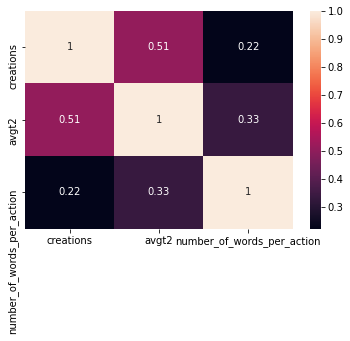

In [225]:
sns.heatmap(X.corr(),annot=True);

In [226]:
rfm_c_log = np.log(X['creations']+0.1)
rfm_n_log = np.log(X['number_of_words_per_action']+0.1)

X = pd.DataFrame({'creations' : rfm_c_log, 'avgt2' : X['avgt2'], 'number_of_words_per_action' : rfm_n_log})

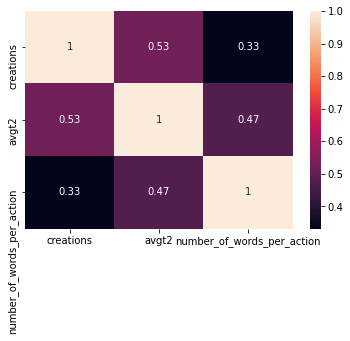

In [227]:
sns.heatmap(X.corr(),annot=True);

# Apply the ML Model

### #########


# Train Test

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=10)


# Decision Tree Classifier

In [229]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [230]:
model.score(X_test, y_test)

0.6648386260051136

In [231]:
y_pred = model.predict(X_test)
y_pred

array([2, 4, 2, ..., 3, 3, 1])

In [232]:
y_test.unique()

array([2, 4, 3, 1])

Text(33.0, 0.5, 'Truth')

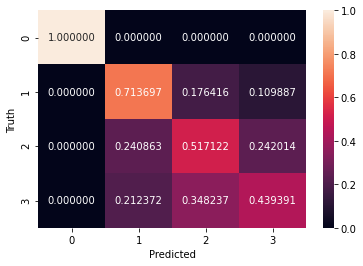

In [233]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred , normalize= 'true')


import seaborn as sn
sn.heatmap(cm , annot = True , fmt = 'f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [235]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5138
           2       0.71      0.71      0.71      9710
           3       0.51      0.52      0.51      6950
           4       0.45      0.44      0.45      5189

    accuracy                           0.66     26987
   macro avg       0.67      0.67      0.67     26987
weighted avg       0.66      0.66      0.66     26987




## K Fold Cross Validation

In [189]:
from sklearn.model_selection import cross_val_predict , cross_val_score
pred = cross_val_predict(model , X_test , y_test)


In [190]:
pred

array([3, 3, 4, ..., 1, 1, 1])

In [191]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(model , X_train , y_train , scoring = 'accuracy' , cv = 3)
accuracy

array([0.80710347, 0.80444457, 0.80601192])

In [192]:
accuracy.mean()

0.8058533217647663

Text(33.0, 0.5, 'Truth')

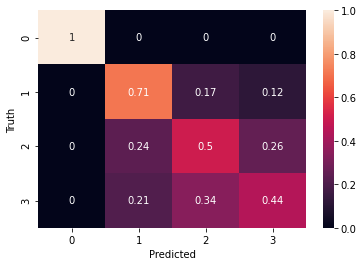

In [193]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , pred , normalize= 'true')

import seaborn as sn
sn.heatmap(cm , annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [194]:
from sklearn.metrics import classification_report

print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     24088
           2       0.71      0.71      0.71      9713
           3       0.51      0.50      0.51      6963
           4       0.44      0.44      0.44      5174

    accuracy                           0.80     45938
   macro avg       0.67      0.67      0.67     45938
weighted avg       0.80      0.80      0.80     45938



# ###############


### Understanding the requirments are important but what is more important is how to make the best out of the data


#### Maniplulating data, understanding the relations among the features, remove redundants and outliers and apply preprocessing methods are all very important to improve the final model accuracy

<a href="https://ibb.co/thpDR4h"><img src="https://i.ibb.co/0nyh5Q6/Screen-Shot-2021-11-23-at-10-25-27.png" alt="Screen-Shot-2021-11-09-at-19-19-03" border="0"></a>

<a href="https://ibb.co/thpDR4h"><img src="https://i.ibb.co/2MNvMtQ/Screen-Shot-2021-11-23-at-10-36-26.png" alt="Screen-Shot-2021-11-09-at-19-19-03" border="0"></a>

<a href="https://ibb.co/thpDR4h"><img src="https://i.ibb.co/V96wVFZ/Screen-Shot-2021-11-23-at-10-27-21.png" alt="Screen-Shot-2021-11-09-at-19-19-03" border="0"></a>